Dataset loaded successfully!

--- Model Performance ---
R-squared (R²): 0.1284
Root Mean Squared Error (RMSE): ₹15,295,065.48
Model Slope (Coefficient): 7208.16
Model Intercept: ₹-406975.38


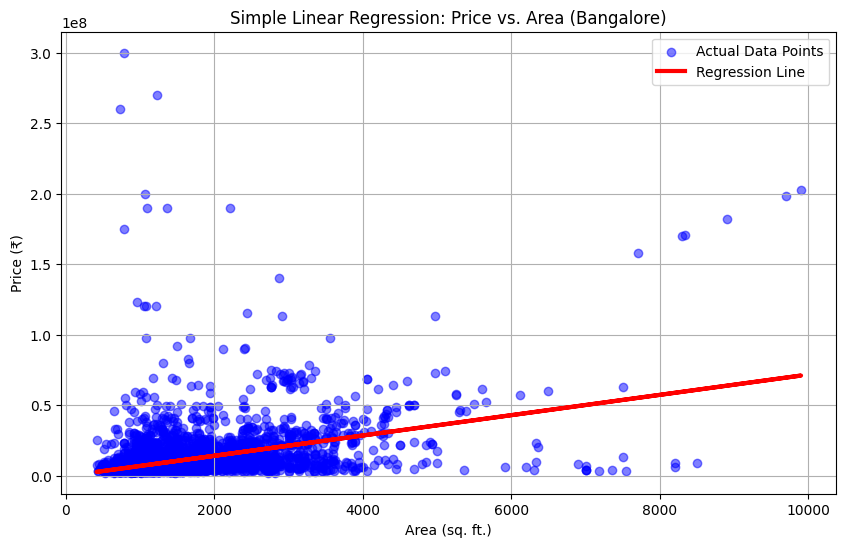


Predicted price for a 1500 sq. ft. house: ₹10,405,263.66


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load the dataset from your uploaded CSV file
# Make sure your file is named 'bangalore_house_prices.csv'
# If not, change the file name in the line below.
try:
    df = pd.read_csv('/content/sample_data/Bangalore.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'bangalore_house_prices.csv' was not found.")
    print("Please upload the CSV file to your Colab session and try again.")
    exit()

# 2. Select the independent and dependent variables
# Based on the image, 'Area' is a good predictor for 'Price'
try:
    X = df[['Area']]
    y = df['Price']
except KeyError:
    print("Error: The 'Area' or 'Price' columns were not found.")
    print("Please check your column names and adjust the code if needed.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# 3. Handle outliers (optional but recommended)
# This removes properties with extremely large areas which can skew the model.
df = df[df['Area'] < 10000]
X = df[['Area']]
y = df['Price']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = model.predict(X_test)

# 7. Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Model Performance ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
print(f"Model Slope (Coefficient): {model.coef_[0]:.2f}")
print(f"Model Intercept: ₹{model.intercept_:.2f}")

# 8. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data Points')
plt.plot(X, model.predict(X), color='red', linewidth=3, label='Regression Line')
plt.title('Simple Linear Regression: Price vs. Area (Bangalore)')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.show()

# 9. Predict the price of a new house
new_house_area = 1500  # A new house with 1500 sq ft
predicted_price = model.predict([[new_house_area]])
print(f"\nPredicted price for a {new_house_area} sq. ft. house: ₹{predicted_price[0]:,.2f}")

In [ ]:
# Import necessary libraries for the interface
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create the interactive widgets
area_input = widgets.IntText(
    value=1500,
    description='Area (sq. ft.):',
    disabled=False
)

output_area = widgets.Output()

predict_button = widgets.Button(
    description='Predict Price',
    button_style='success',
    tooltip='Click to predict the house price'
)

# Define the prediction function
def on_button_click(b):
    with output_area:
        clear_output(wait=True)
        try:
            # Get the value from the user input
            user_area = area_input.value

            if user_area <= 0:
                print("Please enter a positive value for the area.")
                return

            # Make the prediction using the trained model
            predicted_price = model.predict([[user_area]])

            # Display the result with Rupee formatting
            print(f"Predicted price for a {user_area} sq. ft. house:")
            print(f"₹{predicted_price[0]:,.2f}")

        except ValueError:
            print("Invalid input. Please enter a valid number.")

# Link the button to the function
predict_button.on_click(on_button_click)

# Display the interface
print("Simple Bangalore House Price Predictor")
display(area_input, predict_button, output_area)

Simple Bangalore House Price Predictor


IntText(value=1500, description='Area (sq. ft.):')

Button(button_style='success', description='Predict Price', style=ButtonStyle(), tooltip='Click to predict the…

Output()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

# 1. Load the dataset from a local CSV file
file_path = '/content/sample_data/Bangalore.csv'  # Assuming the file is named 'Bangalore.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the correct directory.")
    exit()

# 2. Data Cleaning and Preprocessing
# Correct the required column names based on the error output
required_cols = ['Location', 'Area', 'No. of Bedrooms', 'Price']
if not all(col in df.columns for col in required_cols):
    print("Error: The dataset is missing one of the required columns.")
    print(f"Required: {required_cols}")
    print(f"Available: {df.columns.tolist()}")
    exit()

# Keep only the required columns and drop rows with missing values
df = df[required_cols].dropna()

# Rename columns for clarity and consistency
df.rename(columns={'No. of Bedrooms': 'BHK_Size'}, inplace=True)

# Correct the data types
# We will assume 'Area' is already a float, so no complex conversion is needed
# 'BHK_Size' is likely numeric, but we'll cast it to be sure
df['BHK_Size'] = df['BHK_Size'].astype(int)

# One-Hot Encode the 'Location' column
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

# 3. Define Features (X) and Target (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# 4. Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# 5. Save the trained model and the feature list
joblib.dump(model, 'bangalore_model.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')

print("Model training complete. 'bangalore_model.pkl' and 'model_features.pkl' saved.")


Dataset loaded successfully!
Model training complete. 'bangalore_model.pkl' and 'model_features.pkl' saved.


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib
import os
import re

# Set the file path
file_name = 'Bengaluru_House_Data.csv'
file_path = os.path.join(os.getcwd(), file_name)

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script.")
    exit()

# Data Cleaning and Preprocessing
df.dropna(inplace=True)

# A robust way to find and standardize column names
def find_and_rename_cols(df):
    cols = df.columns.tolist()
    def find_col(patterns):
        for pattern in patterns:
            match = next((col for col in cols if re.search(pattern, col, re.IGNORECASE)), None)
            if match:
                return match
        return None

    location_col = find_col([r'loc(a|tion)'])
    size_col = find_col([r'size', r'bhk', r'bedrooms'])
    sqft_col = find_col([r'sqft', r'area'])
    price_col = find_col([r'price'])

    if not all([location_col, size_col, sqft_col, price_col]):
        print("Error: Could not find all required columns.")
        print(f"Found: Location='{location_col}', Size='{size_col}', SqFt='{sqft_col}', Price='{price_col}'")
        print(f"Available: {cols}")
        exit()

    df.rename(columns={
        location_col: 'location',
        size_col: 'size',
        sqft_col: 'total_sqft',
        price_col: 'price'
    }, inplace=True)
    return df

df = find_and_rename_cols(df)

# Handle a common data entry error in 'total_sqft' (e.g., '1000 - 1200')
def convert_sqft_to_num(x):
    tokens = str(x).split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except (ValueError, TypeError):
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.dropna(subset=['total_sqft'], inplace=True)

# Convert 'size' (BHK) to a numerical value
df['size'] = df['size'].astype(str).str.extract('(\d+)').astype(int)

# --- Final list of 9 locations ---
selected_locations = ['Indira Nagar', 'Jigani', 'Yelahanka', 'Marathahalli', 'JP Nagar', 'Koramangala', 'Basavanagudi', 'Konankunte', 'Uttarahalli','Indira Nagar']
df = df[df['location'].isin(selected_locations)]

# One-Hot Encode the 'location' column
df['location'] = df['location'].astype(str)
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)

# Define Features (X) and Target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Save the trained model and the feature list
joblib.dump(model, 'bangalore_model.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')

print("Model training complete. 'bangalore_model.pkl' and 'model_features.pkl' saved.")


Error: The file '/content/Bengaluru_House_Data.csv' was not found.
Please make sure the CSV file is in the same directory as this script.
Model training complete. 'bangalore_model.pkl' and 'model_features.pkl' saved.


<>:67: SyntaxWarning: invalid escape sequence '\d'
<>:67: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2620231162.py:67: SyntaxWarning: invalid escape sequence '\d'
  df['size'] = df['size'].astype(str).str.extract('(\d+)').astype(int)
